## Webscraping and Analysis (using tidyverse, tidytext, and rvest)

This notebook is a simple tutorial on how to scrap data from the web, cleaning it (tidy) and performing some analysis on it. At the end of this tutorial, we should be able to scrap webpages, tidy the data we getr and perform some analysis on it. I learnt how to use rvest when I went to a r-ladies meet-up.(yep, "ladies", according to their policy men could attend so I didnt have any problems)

I hope you enjoy it as I did. 

### fun time !!

In [1]:
# if you dont have any of the libraries installed below use:
# install.packages(<package_name>), add repos = "https://cloud.r-project.org) if you are not using r-studio.

## load the libraries
library(tidyverse)
library(tidytext)
library(rvest)
library(magrittr)
library(stringr)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: xml2

Attaching package: 'rvest'

The following object is masked from 'package:readr':

    guess_encoding


Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract



Now that we have the libraries loaded, we can go ahead and load our html page we want to scrap. For this example I will be scraping the iris dataset from wikipedia since its open to all. I come to realize that the iris dataset is kind of like the hello world in data science.

__NB:__ you can check if the library has loaded or not by using the **sessionInfo()** function and read under attach you should see the libraries there.

In [3]:
# assigning address
iris_url <- "https://en.wikipedia.org/wiki/Iris_flower_data_set"

#load the html using read_html() function which take the address as an argument(parameter). 
html_page <- read_html(iris_url)

#prints few lines of the html code
html_page

{xml_document}
<html class="client-nojs" lang="en" dir="ltr">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body class="mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject  ...


We have first step and important step down. hoho!!.. Now what we are going to get the first paragraph and the dataset from the page. 

We will use __html_node("p")__ for the getting the first paragraph or use __html_nodes("p")__ to get all the paragraph and use __extract2(element_number)__ where elemet number is 1 (for 1st p) or  2 (for 2nd p) and so on. Then we finally use __html_text()__ to get just the text without any tags.

Same applies for the dataset but instead of "p" as an argument for html_node or html_nodes it will table. and instead of html_text() we use html_table() to get our data into a nice dataFrame for analysis. 

__NB:__ to know what the tag is you can use developer's mode from your browser of get this tool called __selector Gadget__

I also use the %>% pipe to make the code look nicer. I also learnt it from R for Data Sceince book. And the author gave a simple way to understand it. One of the simplest example I can think of is:

       V1      
 Min.   : 0.7  
 1st Qu.: 4.0  
 Median : 7.3  
 Mean   : 7.3  
 3rd Qu.:10.6  
 Max.   :13.9  

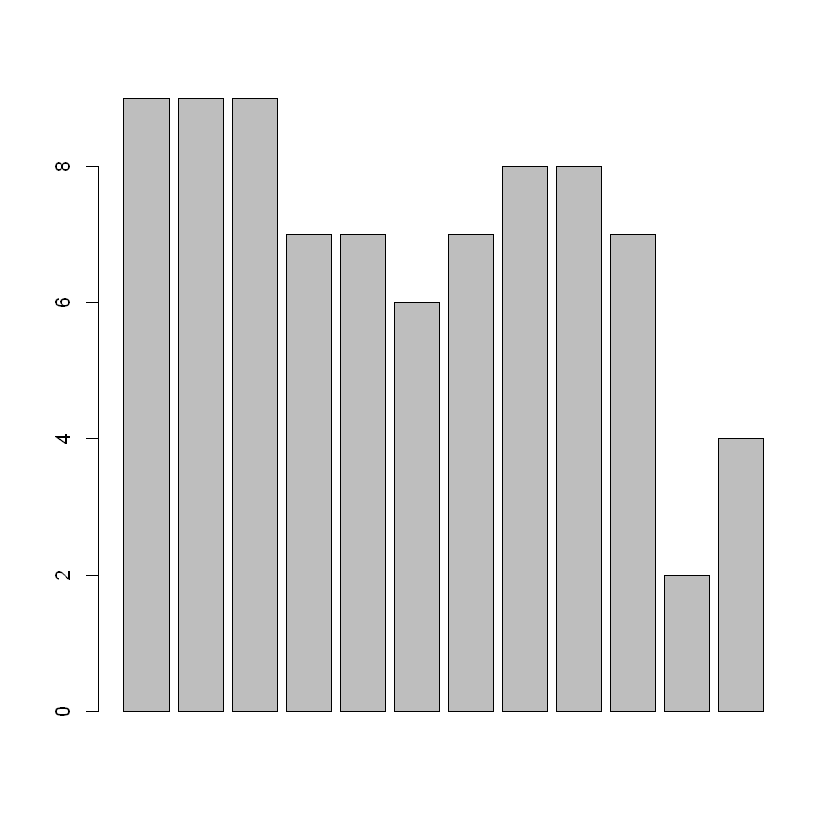

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   6.750   7.000   6.917   8.250   9.000 

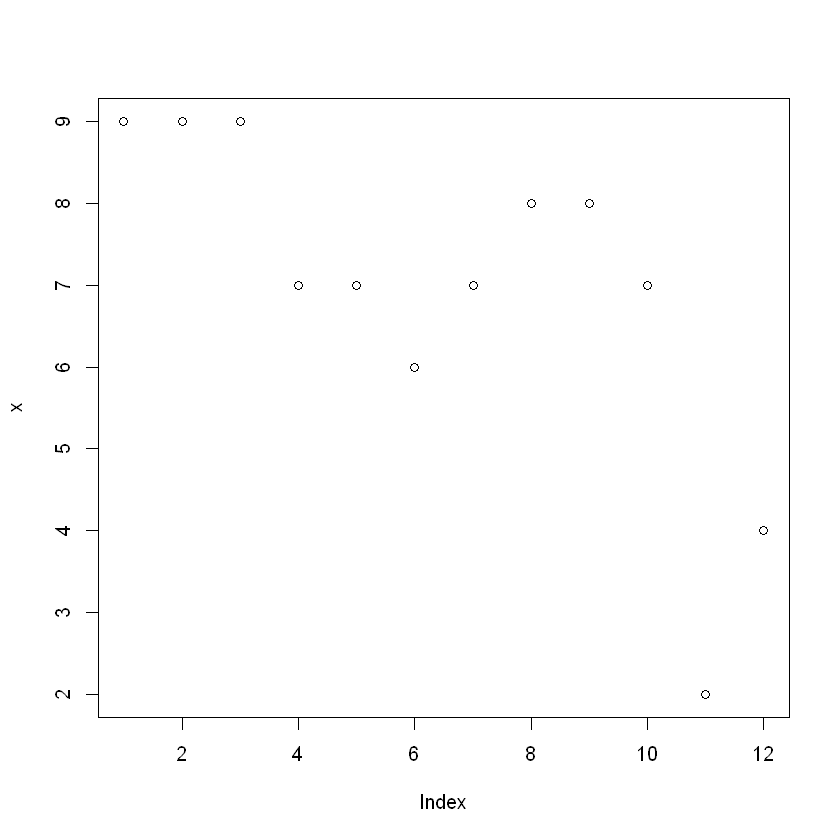

In [4]:
x <- c(9,9,9,7,7,6,7,8,8,7,2,4) # random numbers
x %>% 
    barplot() %>% #ramdom grapgh
    summary() 

## so this read as take x then pass it to the next funtion

# without the pipe will be 

#use see how we keep repeating the x object. 
plot(x)
summary(x) 


In [5]:
# getting the first paragraph
html_page %>%
    html_node("p") %>%
    html_text()

#getting the datasets
iris_table <- html_page %>%
                    html_nodes("table") %>%
                    extract2(1) %>%
                    html_table(header = TRUE)

#take a peak at your data                     
head(iris_table)

# now we want to change the column name to one word so its easy to access the minstead of wrapping it with "" all the time
# so we will use str_replace in the stringr package
names(iris_table) <- str_replace((names(iris_table)), " ", "_")

# take another peak to see if the changes took place
head(iris_table)

[1] "The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula \"all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus\".[3]"

Sepal length,Sepal width,Petal length,Petal width,Species
5.1,3.5,1.4,0.2,I. setosa
4.9,3.0,1.4,0.2,I. setosa
4.7,3.2,1.3,0.2,I. setosa
4.6,3.1,1.5,0.2,I. setosa
5.0,3.6,1.4,0.2,I. setosa
5.4,3.9,1.7,0.4,I. setosa


Sepal_length,Sepal_width,Petal_length,Petal_width,Species
5.1,3.5,1.4,0.2,I. setosa
4.9,3.0,1.4,0.2,I. setosa
4.7,3.2,1.3,0.2,I. setosa
4.6,3.1,1.5,0.2,I. setosa
5.0,3.6,1.4,0.2,I. setosa
5.4,3.9,1.7,0.4,I. setosa


We are done!!. Easay right? Bettter than copy and paste. One way to know all the functions an what it entiles is using the __help(package="package_name)__ function (if only there is a documentaion) or sometime i use the tab button to see some of the other attributes it has and google them to read about what they do. Example is html.(then i press the tab)

## Example #2
So this example is based on what I learnt at r-ladies. I decided to use it because its intreasting. I wont say whats intreating about it right now. We will all find it togther :). But I will tell you what we are going to do.

For this example, we are going to extract Inaugural Addresses from past and Presidents of the U.S. There is a website "http://avalon.law.yale.edu/subject_menus/inaug.asp" that has most of the speeches except Obama 2013, Trump 2017, VanBuren 1837, Buchanan 1857, Garfield 1881, and Coolidge 1925 (as far I know)

In [124]:
inaugral_url <- "http://avalon.law.yale.edu/subject_menus/inaug.asp"
read_inaugral <- read_html(inaugral_url)

## by using the selectorGadget tool i know that all the data are in the 2nd table(i.e President name. and terms(up to 4th term))

inaugral_data <- read_inaugral %>%
                    html_nodes("table") %>%
                    extract2(3) %>%
                    html_table(header = TRUE, fill = TRUE)

# #now that we have the data we can peak to see if we did it write
 head(inaugral_data)

President,1st Term,2nd Term,3rd Term,4th Term
George Washington,1789,1793,NA,NA
John Adams,1797,NA,NA,NA
Thomas Jefferson,1801,1805,NA,NA
James Madison,1809,1813,NA,NA
James Monroe,1817,1821,NA,NA
John Quincy Adams,1825,NA,NA,NA


#### doesn't really look good right? Because without knowing what we are doing, it would be hard for someone to know what the values under the 1st term actually mean. So we will do some tidy. 

In [125]:
inaugral_data_tidy <- inaugral_data %>%
                        gather(term, year, -President) %>%
                        filter(!is.na(year)) %>%
                        #select(-term) %>%
                        arrange(year)

head(inaugral_data_tidy) # looks much better yeah? 

President,term,year
George Washington,1st Term,1789
George Washington,2nd Term,1793
John Adams,1st Term,1797
Thomas Jefferson,1st Term,1801
Thomas Jefferson,2nd Term,1805
James Madison,1st Term,1809


### now lets get the link to each years inaugral addresss

 To get hte links from the page we will still use our __html_nodes("a")__ to get all the links from the page and use __html_attr("href")__ to get the address from the link. 
 
so __a href="../18th_century/wash1.asp">1789/a__ (didn't add the tag because so it doesn't creat a link) is an example of the output of __html_node__("a") and "**../18th_century/wash1.asp**" will be the output for __html_attr("href")__

so I next i will to the website itself to find the address of the link(you can find this by righ cliking on the link and click inspect) i want and also to study the pattern in which the links are constructed. 

In [22]:
# get the the link from page 
inaugaral_sublinks <- (read_inaugral %>%
                   html_nodes("a") %>%
                   html_attr("href"))
# since we know the first and last link we need we can find thier index using which
which(inaugaral_sublinks %in% c("../18th_century/wash1.asp","../21st_century/obama.asp"))

#we could have gone ahead and added the above code by doing:
# ind <- which(inaugaral_sublinks %in% c("../18th_century/wash1.asp","../21st_century/obama.asp"))
#inaugaral_sublinks[ind[1]:ind[2]]
# but i like to see my output before proceding but because i dont like hard coding i will use the above method letter

[1] 12 67

In [46]:
## now we know their index we can subset the links that we need
ind <- which(inaugaral_sublinks %in% c("../18th_century/wash1.asp","../21st_century/gbush2.asp"))
inaugaral_sublinks <- inaugaral_sublinks[ind[1]:ind[2]]

# now lets create the urls to get the speeches from 
urlstump <- "http://avalon.law.yale.edu/"
inaugaral_full_links <- paste0(urlstump, str_replace(inaugaral_sublinks, "../", ""))

inaugral_data_tidy$url <- inaugaral_full_links # this create a new column url wiht each corresponding url

#take a peak
head(inaugral_data_tidy)

President,term,year,url
George Washington,1st Term,1789,http://avalon.law.yale.edu/18th_century/wash1.asp
George Washington,2nd Term,1793,http://avalon.law.yale.edu/18th_century/wash2.asp
John Adams,1st Term,1797,http://avalon.law.yale.edu/18th_century/adams.asp
Thomas Jefferson,1st Term,1801,http://avalon.law.yale.edu/19th_century/jefinau1.asp
Thomas Jefferson,2nd Term,1805,http://avalon.law.yale.edu/19th_century/jefinau2.asp
James Madison,1st Term,1809,http://avalon.law.yale.edu/19th_century/madison1.asp


we are almost done. Now are have that we need so we will go ahead and scrap the speeches.

In [50]:
# fuction to scrap the addresses 

get_inaugrations <- function(url){
    test <- try(url %>% read_html(), silent = TRUE)
    if("try-error" %in% class(test)){
        return("There was an error reading retrieving the content from the url specified")
    }else
        url %>% read_html() %>%
            html_nodes("p") %>%
            html_text() -> address
    
    return(unlist(address)) 
}
    
inaugaral_full_speech <- inaugral_data_tidy %>%
                            mutate(addresses_text = (map(url,get_inaugrations)))

inaugaral_full_speech$address[[1]]

Warning message:
"closing unused connection 4 (http://avalon.law.yale.edu/19th_century/vanburen.asp)"Warning message:
"closing unused connection 5 (http://avalon.law.yale.edu/19th_century/garfield.asp)"Warning message:
"closing unused connection 4 (http://avalon.law.yale.edu/19th_century/buchanan.asp)"Warning message:
"closing unused connection 4 (http://avalon.law.yale.edu/20th_century/coolidge.asp)"

[1] " Fellow-Citizens of the Senate and of the House of Representatives: "                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
[2] "Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years--a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications, could not but overwhelm with despondence one who (inheriting inferior endowments from nature and unpracticed in the duties of civil administration) ought to be peculiarly conscious of his own deficiencies. In this conflict of emotions all I dare aver is that it has been my faithful study to collect my duty from a just appreciation of every circumstance by which it might be affected. All I dare hope is that if, in executing this task, I have been too much swayed by a grateful remembrance of former instances, or by an affectionate sensibility to this transcendent proof of the confidence of my fellow-citizens, and have thence too little consulted my incapacity as well as disinclination for the weighty and untried cares before me, my error will be palliated by the motives which mislead me, and its consequences be judged by my country with some share of the partia

Finally we are done. So I promised before to tell you about a an interesting fact. Actually I didn't find this. Samantha, the lady who gave the presentation at he r-ladies meetup I attended spoke about it. The interesting fact is that the president that gave the longest speech died from pneumonia dus to standing out in the cold for too long without a coat

So let find out who it was.

In [66]:
inaugaral_full_speech %>% 
      select(-url,-term) %>% 
      unnest() %>% 
      unnest_tokens(word, addresses_text) -> presidential_words
      head(presidential_words)

,President,year,word
1,George Washington,1789,fellow
1.1,George Washington,1789,citizens
1.2,George Washington,1789,of
1.3,George Washington,1789,the
1.4,George Washington,1789,senate
1.5,George Washington,1789,and


In [120]:
presidential_words %>% 
  group_by(President,year) %>% 
  summarize(num_words = n()) %>%
  arrange(desc(num_words)) -> presidential_wordtotals

head(presidential_wordtotals)

#print the name of the president with heigest no of words
presidential_wordtotals$President[presidential_wordtotals$num_words == max(presidential_wordtotals$num_words)]

President,year,num_words
William Henry Harrison,1841,8459
William Howard Taft,1909,5440
James Polk,1845,4813
James Monroe,1821,4473
Grover Cleveland,1893,4403
William McKinley,1897,3977


[1] "William Henry Harrison"

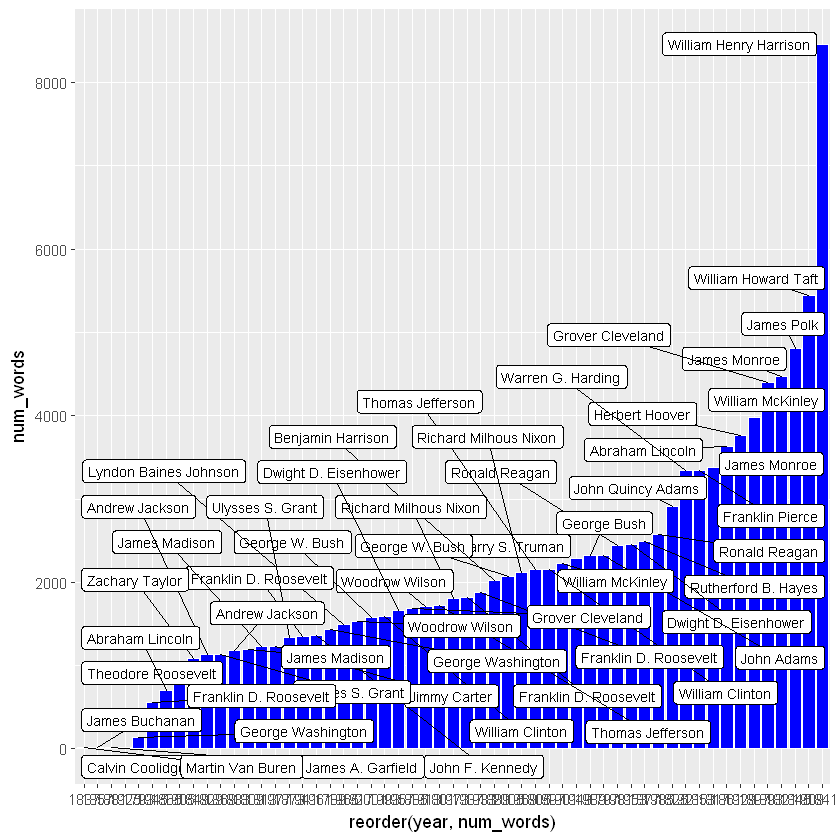

In [122]:
ggplot(data = presidential_wordtotals) + 
  geom_bar(mapping = aes(x = reorder(year, num_words), y = num_words), stat = "identity", fill = 'blue', color = 'white') + 
 geom_label_repel(aes(x = reorder(year, num_words), y = num_words, label = President), size = 3.0)